# Batch Normalizaion

批次正規化  
[keras document](https://keras.io/zh/layers/normalization/)   
[李宏毅影片](https://www.youtube.com/watch?v=BZh1ltr5Rkg)

批次正規化的概念從特徵正規化來構想會非常的直觀   
![](https://i.imgur.com/NgRS8sm.png)

在尺度比較大的特徵資料上，做梯度變換的速度會較快  
而在小尺度上的梯度變化就會比較小，被拖累  
因此必須在資料上做正規化  

把這個概念套用在深度網路內的隱藏層   
在每一層傳遞的資料進入神經運算元之前  
把傳入的數值做正規化，這可以讓整體網路獲得以下好處:  
* Internal Covariate Shift 減少
* 有效解決梯度爆炸
* 訓練加速
* 對於參數的初始化影響較小  
* 在訓練結果不好的時候，是一個對抗over fitting的手段
* 提升訓練準確度
* 對於如sigmoid與tanh此類的激勵函數，可以避免數值掉到飽和區



In [1]:
import numpy as np
import pandas as pd
import keras.utils as np_utils
from keras.datasets import mnist

Using TensorFlow backend.


## MNIST資料

利用MINIST資料來做試驗  
首先先做基本的維度處理與one-hot encoding

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train),-1).astype('float32')/255
x_test = x_test.reshape(len(x_test),-1).astype('float32')/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Fully connective model

建立一個七層的全連結網路  
每層有一百個神經元  
最後街上一個softmax分類器

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=100,input_dim=784,activation='relu',kernel_initializer='normal'))

for _ in range(5):
    model.add(Dense(units=100,activation='relu',kernel_initializer='normal'))
    
model.add(Dense(units=10,activation='softmax',kernel_initializer='normal'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dens

### 訓練1

利用Adam來做optimizer  
損失函數就定義為categorical_crossentropy  
可以看到最後在訓練組上正確率為98.2%

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history= model.fit(x_train,y_train,validation_split=0.2,batch_size=1000,epochs=20,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 41us/step - loss: 1.6475 - acc: 0.4450 - val_loss: 0.8026 - val_acc: 0.7278
Epoch 2/20
48000/48000 [==============================] - 0s 8us/step - loss: 0.6983 - acc: 0.7780 - val_loss: 0.5474 - val_acc: 0.8342
Epoch 3/20
48000/48000 [==============================] - 0s 9us/step - loss: 0.4891 - acc: 0.8550 - val_loss: 0.3972 - val_acc: 0.8877
Epoch 4/20
48000/48000 [==============================] - 0s 9us/step - loss: 0.3487 - acc: 0.9004 - val_loss: 0.2952 - val_acc: 0.9134
Epoch 5/20
48000/48000 [==============================] - 0s 9us/step - loss: 0.2594 - acc: 0.9251 - val_loss: 0.2330 - val_acc: 0.9337
Epoch 6/20
48000/48000 [==============================] - 0s 8us/step - loss: 0.2129 - acc: 0.9374 - val_loss: 0.2043 - val_acc: 0.9422
Epoch 7/20
48000/48000 [==============================] - 0s 9us/step - loss: 0.1842 

## Fully connective model with batchnormalization

再以剛剛同樣的網路架構下  
在每個激勵函數後面都接上batchnormalization  

In [5]:
from keras.layers import BatchNormalization

model2 = Sequential()

model2.add(Dense(units=100,input_dim=784,activation='relu',kernel_initializer='normal'))

for _ in range(5):
    model2.add(BatchNormalization())
    model2.add(Dense(units=100,input_dim=784,activation='relu',kernel_initializer='normal'))
    
model2.add(BatchNormalization())    
model2.add(Dense(units=10,activation='softmax',kernel_initializer='normal'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
__________

可以看到最後在訓練組上的準確率達到99.7%

In [6]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history2 = model2.fit(x_train,y_train,validation_split=0.2,batch_size=1000,epochs=20,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.6539 - acc: 0.8217 - val_loss: 0.1940 - val_acc: 0.9436
Epoch 2/20
48000/48000 [==============================] - 1s 14us/step - loss: 0.1584 - acc: 0.9558 - val_loss: 0.1415 - val_acc: 0.9582
Epoch 3/20
48000/48000 [==============================] - 1s 14us/step - loss: 0.0987 - acc: 0.9725 - val_loss: 0.1223 - val_acc: 0.9634
Epoch 4/20
48000/48000 [==============================] - 1s 13us/step - loss: 0.0680 - acc: 0.9812 - val_loss: 0.1116 - val_acc: 0.9677
Epoch 5/20
48000/48000 [==============================] - 1s 14us/step - loss: 0.0500 - acc: 0.9858 - val_loss: 0.1137 - val_acc: 0.9669
Epoch 6/20
48000/48000 [==============================] - 1s 14us/step - loss: 0.0351 - acc: 0.9906 - val_loss: 0.1110 - val_acc: 0.9683
Epoch 7/20
48000/48000 [==============================] - 1s 14us/step - loss: 0.0277 - acc: 0.9917 - val_loss: 0.1144 - val_acc

## plot trainning history

把訓練的結果展開來看  
可以看到在損失函數的值，其下降速度快了不少  
準確率的提升也是

(Text(0.5, 1.0, 'loss'), <matplotlib.legend.Legend at 0x1ec8816cac8>)

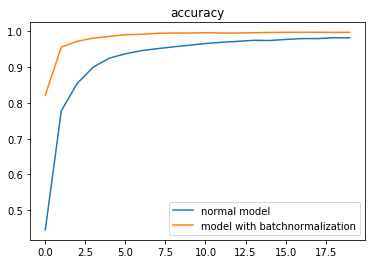

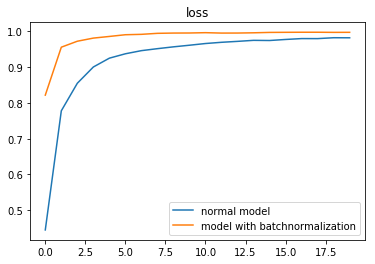

In [8]:
import matplotlib.pyplot as plt

plt.plot(train_history.history['acc'],label='normal model')
plt.plot(train_history2.history['acc'],label='model with batchnormalization')
plt.title('accuracy'),plt.legend()

plt.figure()
plt.plot(train_history.history['acc'],label='normal model')
plt.plot(train_history2.history['acc'],label='model with batchnormalization')
plt.title('loss'),plt.legend()

In [9]:
score=model.evaluate(x_test,y_test)
score2=model2.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 55us/step


## Test data
可以看到在test data的結果也較優

In [11]:
print('Accuary of FCN: %.1f'%(score[1]*100))
print('Accuary of FCN w/ BN: %.1f'%(score2[1]*100))

Accuary of FCN: 96.5
Accuary of FCN w/ BN: 97.1


# Summary

![](https://imgur.com/J2eSYdi.png)



從model2的summary可以看到有BN有四個參數  
分別就是: gamma, beta, batch_mean and batch_std  

BN的參數調動如下，非常直觀: 

BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

